# SVM Linear

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
import seaborn as sns

# Hinge loss function 
![Hinge loss function ](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*3xErahGeTFnbDiRuNXjAuA.png "Hinge loss function ")

La funcion hingle nos permite calcular el error de cada punto, si el signo de la prediccion es igual al signo de la etiqueta, el error es 0, si no, el error es la distancia entre el punto y el margen de decision

In [3]:
w = [1, 2]
b = -5
x = [1, 2]
y = -1
loss = y * (np.dot(x, w) + b) >= 1
loss

False

In [4]:
w = [0.5, 0.5]
b = -2.5
x = [1, 2]
y = -1
loss = y * (np.dot(x, w) + b) >= 1
loss


True

In [5]:
w = [0.8, 0.8]
b = -1
x = [1, 2]
y = 1
loss = y * (np.dot(x, w) + b) >= 1
loss

True

En las SVM, el parámetro más comúnmente utilizado es "C", que controla la penalización por errores en la clasificación y la regularización del modelo. El valor de "C" es inversamente proporcional a la regularización; un valor alto de "C" permite un ajuste más ajustado a los datos de entrenamiento (puede llevar al sobreajuste), mientras que un valor bajo de "C" permite un modelo más suave y simplificado.

El parámetro "C" es esencial en las SVM y se refiere a la cantidad de "tolerancia" que se permite para los puntos de datos mal clasificados en el proceso de optimización. Un valor alto de "C" significa que se penalizarán fuertemente los errores de clasificación, lo que puede llevar a un modelo más complejo y ajustado a los datos. Un valor bajo de "C" permite un margen más amplio y da como resultado un modelo más suave y simplificado.

Si estás trabajando con un parámetro llamado "lambda" en el contexto de una SVM, es posible que se deba a una terminología específica de una implementación particular o que se esté utilizando "lambda" en lugar de "C" como el parámetro de regularización. Te recomiendo consultar la documentación o el contexto específico de la biblioteca o la implementación que estás utilizando para obtener detalles precisos sobre el significado y el propósito de ese parámetro "lambda". En la mayoría de los casos, "C" es el parámetro relevante para controlar la regularización en una SVM estándar.







El parametro lerningrate solo

In [31]:
np.random.randn()

0.1175349329499576

In [78]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.001, n_iters=1000)->None:
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b:int = np.random.randn()
    
    def __loss__(self, x, y) -> bool:
        return y * (np.dot(x, self.w) - self.b) >= 1
    
    def fit(self, X, y, plot:bool=False) -> None:
        
        X = (X-np.mean(X, axis=0)) / np.std(X, axis=0)
        _, n_features = X.shape
        y_:np.array = np.where(y <= 0, -1, 1)
        
        self.w:np.array = np.zeros(n_features)
        
        for i in range(1, self.n_iters + 1):
            for idx, x_i in enumerate(X):
                condition = self.__loss__(x_i, y_[idx])
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
            
            if plot:
                if (i% 100==0) or (i==self.n_iters) or (i==1):
                    xsupp, y1supp, y2supp = self.get_support_vectors()
                    plt.plot(xsupp, y1supp, 'g--')
                    plt.plot(xsupp, y2supp, 'k--')
                    
                    x_points = np.linspace(-1, 1)
                    y_points = -(self.w[0] * x_points + self.b) / self.w[1]
                    sns.scatterplot(x=X[:, 0], 
                                    y=X[:, 1], 
                                    hue=y)
                    plt.plot(x_points, y_points, 'b')
                    plt.title('Epoch:{} -- W:{} -- B:{}'.format(i, self.w, round(self.b, 3)))
                    plt.show()
    
    def get_params(self)->tuple:
        return self.w, self.b
    
    def get_support_vectors(self) -> tuple:
        x1 = -1
        x2 = 1
        y11 = (-self.w[0]*x1 - self.b + 1) / self.w[1]
        y21 = (-self.w[0]*x2 - self.b + 1) / self.w[1]
        y12 = (-self.w[0]*x1 - self.b - 1) / self.w[1]
        y22 = (-self.w[0]*x2 - self.b - 1) / self.w[1]
        return [x1, x2], [y11, y21], [y12, y22]

    def predict(self, X) -> np.array:
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Generar dataset aleatorio, donde tenemos dos clases con dos caracteristicas cada una

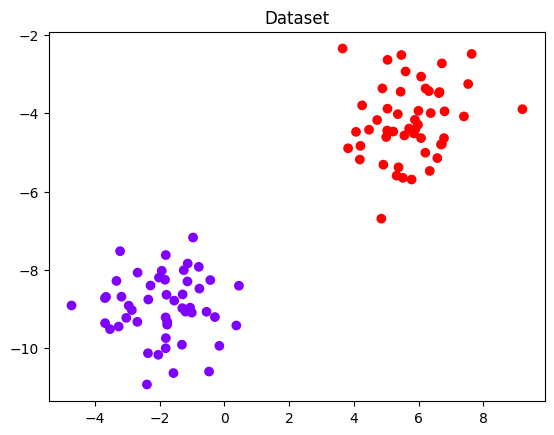

In [70]:
x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=40)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')
plt.title('Dataset')
plt.show()

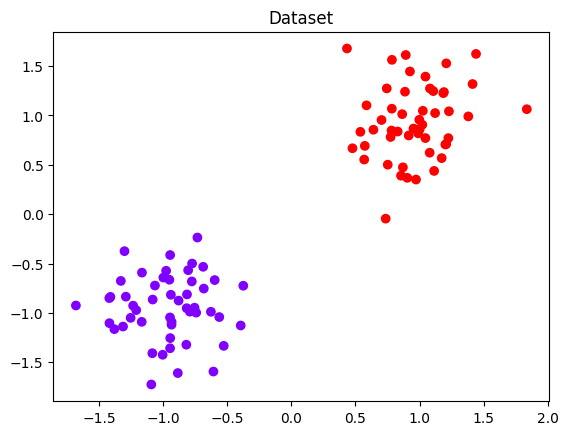

In [71]:
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')
plt.title('Dataset')
plt.show()

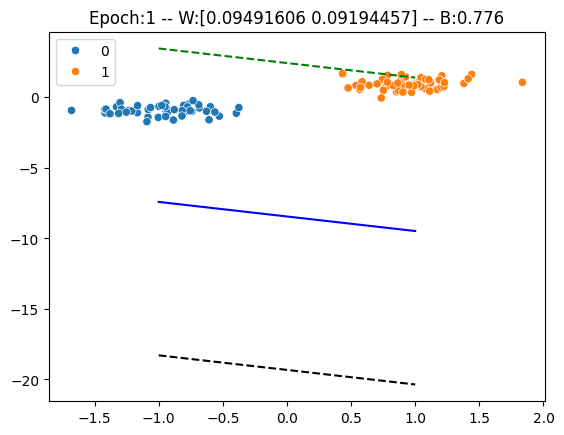

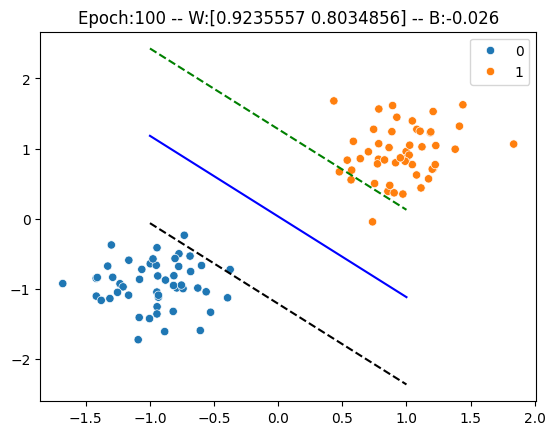

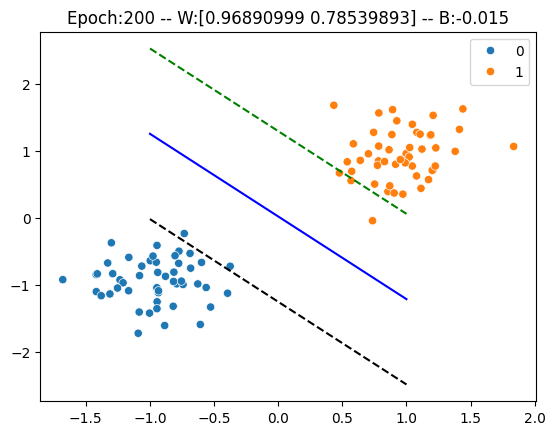

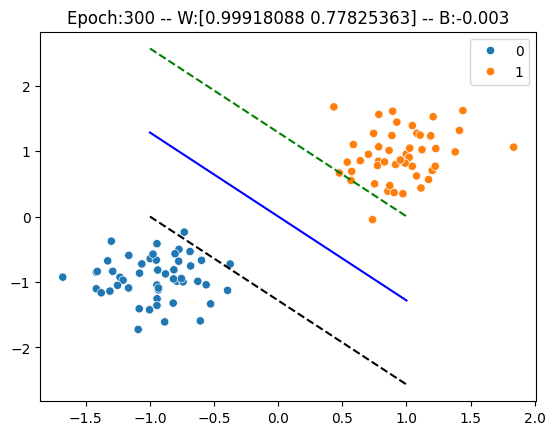

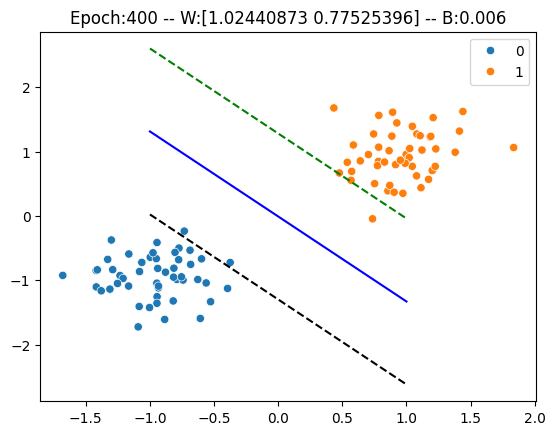

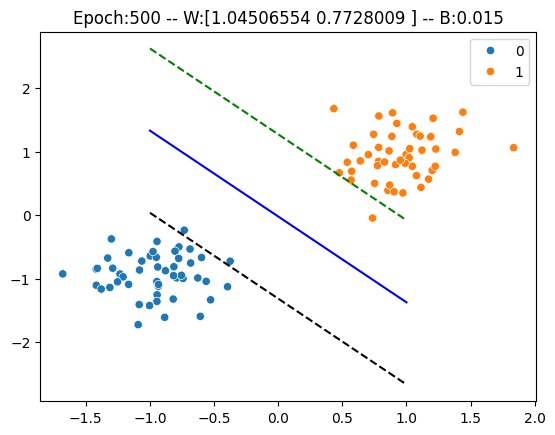

In [81]:
svm = SVM(n_iters=500, lambda_param=0.01, learning_rate=0.001)
svm.fit(x, y, plot=True)